## データの可視化して考察をまとめる

In [24]:
DATA='../data/train.tsv'
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
df=pd.read_table(DATA)

In [11]:
df

,id,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Y
0,5,90,Private,313986,11th,7,Never-married,Handlers-cleaners,Own-child,White,Male,0,0,40,United-States,<=50K
1,10,46,Private,74895,Assoc-acdm,12,Married-civ-spouse,Craft-repair,Husband,White,Male,0,1485,55,United-States,<=50K
2,11,37,Private,67433,HS-grad,9,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,40,United-States,>50K
3,13,45,Local-gov,144940,Masters,14,Divorced,Prof-specialty,Unmarried,Black,Female,0,0,40,United-States,<=50K
4,14,40,Private,272960,Assoc-acdm,12,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,42,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16275,32552,42,Private,83411,Some-college,10,Divorced,Exec-managerial,Not-in-family,White,Male,0,1408,40,United-States,<=50K
16276,32553,59,Self-emp-not-inc,223131,HS-grad,9,Divorced,Exec-managerial,Not-in-family,White,Male,0,0,60,United-States,<=50K
16277,32554,42,Private,142424,Assoc-voc,11,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,<=50K
16278,32555,19,?,119234,Some-college,10,Never-married,?,Other-relative,White,Female,0,0,15,United-States,<=50K


- カテゴリデータ
    - ['workclass','education','marital-status','occupation', 'relationship', 'race', 'sex', 'native-country']
- 数値データ
    - ['id', 'age','fnlwgt','education-num','capital-gain', 'capital-loss', 'hours-per-week']

## 予測したデータを見てみる
Yを数値データにしたいから、50K以下を０、50Kより大きのを1にする

In [27]:
df['Y'].replace(['<=50K','>50K'],[0,1],inplace=True)
df['Y']

0        0
1        0
2        1
3        0
4        1
        ..
16275    0
16276    0
16277    0
16278    0
16279    0
Name: Y, Length: 16280, dtype: int64

(array([12288.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  3992.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

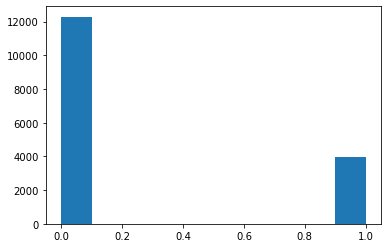

In [20]:
plt.hist(df['Y'])

## 数値データだけの散布図、ヒストグラム、ヒートマップ

/Users/jaguar2801/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


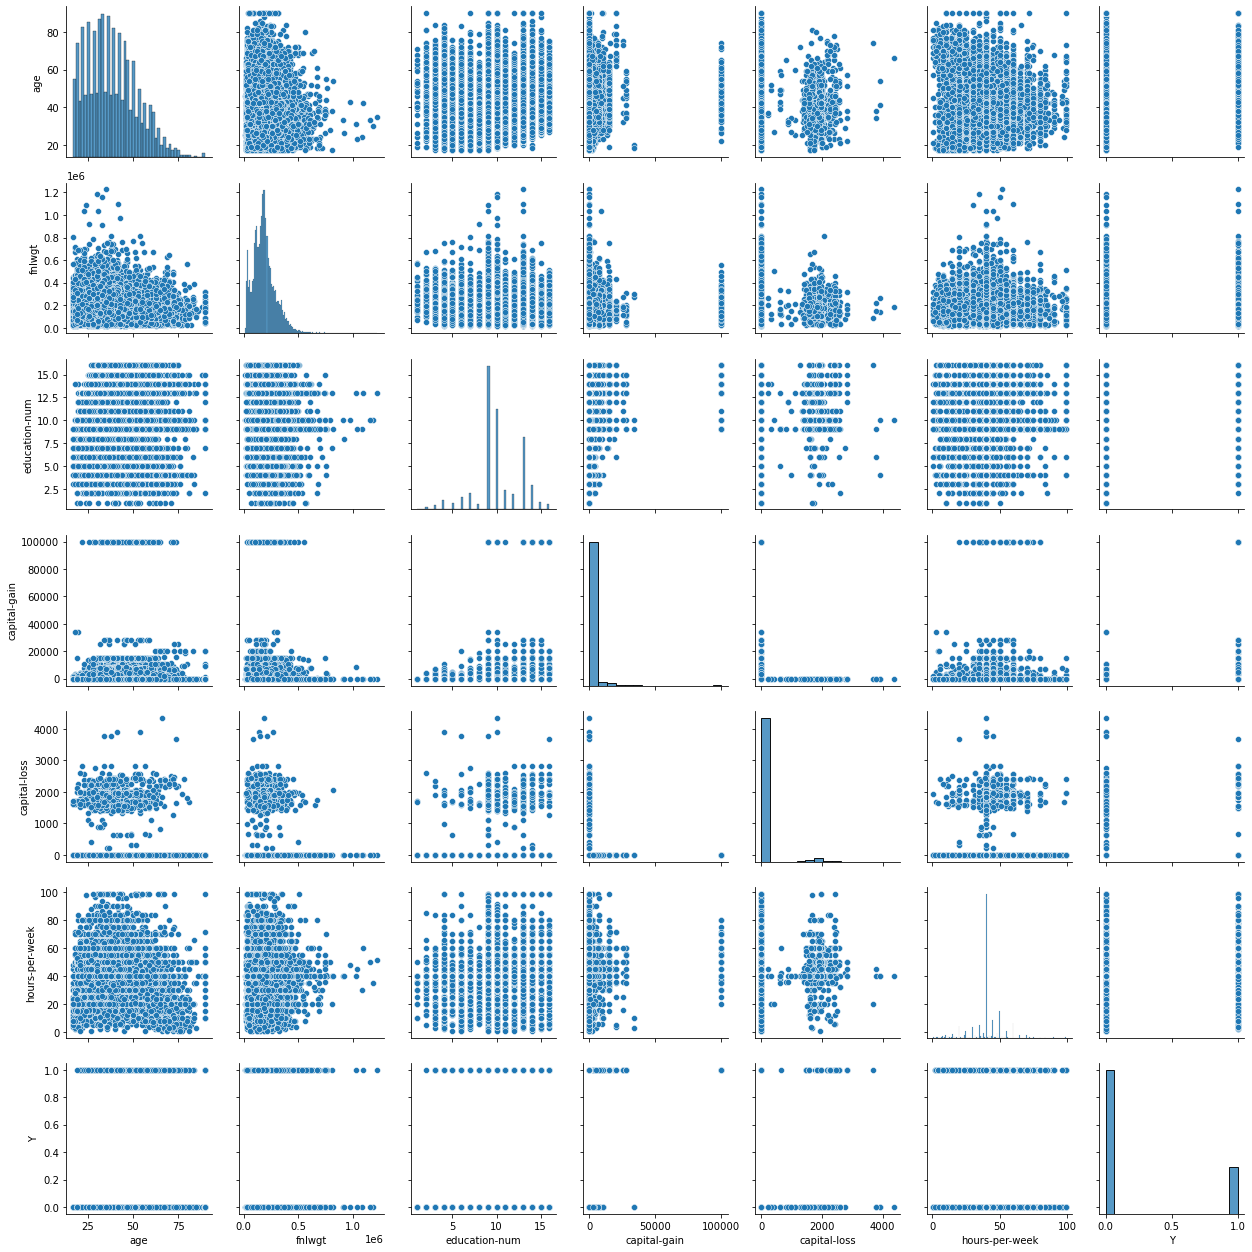

In [21]:
col=[ 'age','fnlwgt','education-num','capital-gain', 'capital-loss', 'hours-per-week','Y']
sns.pairplot(df[col],size=2.5)
plt.tight_layout()
plt.show()

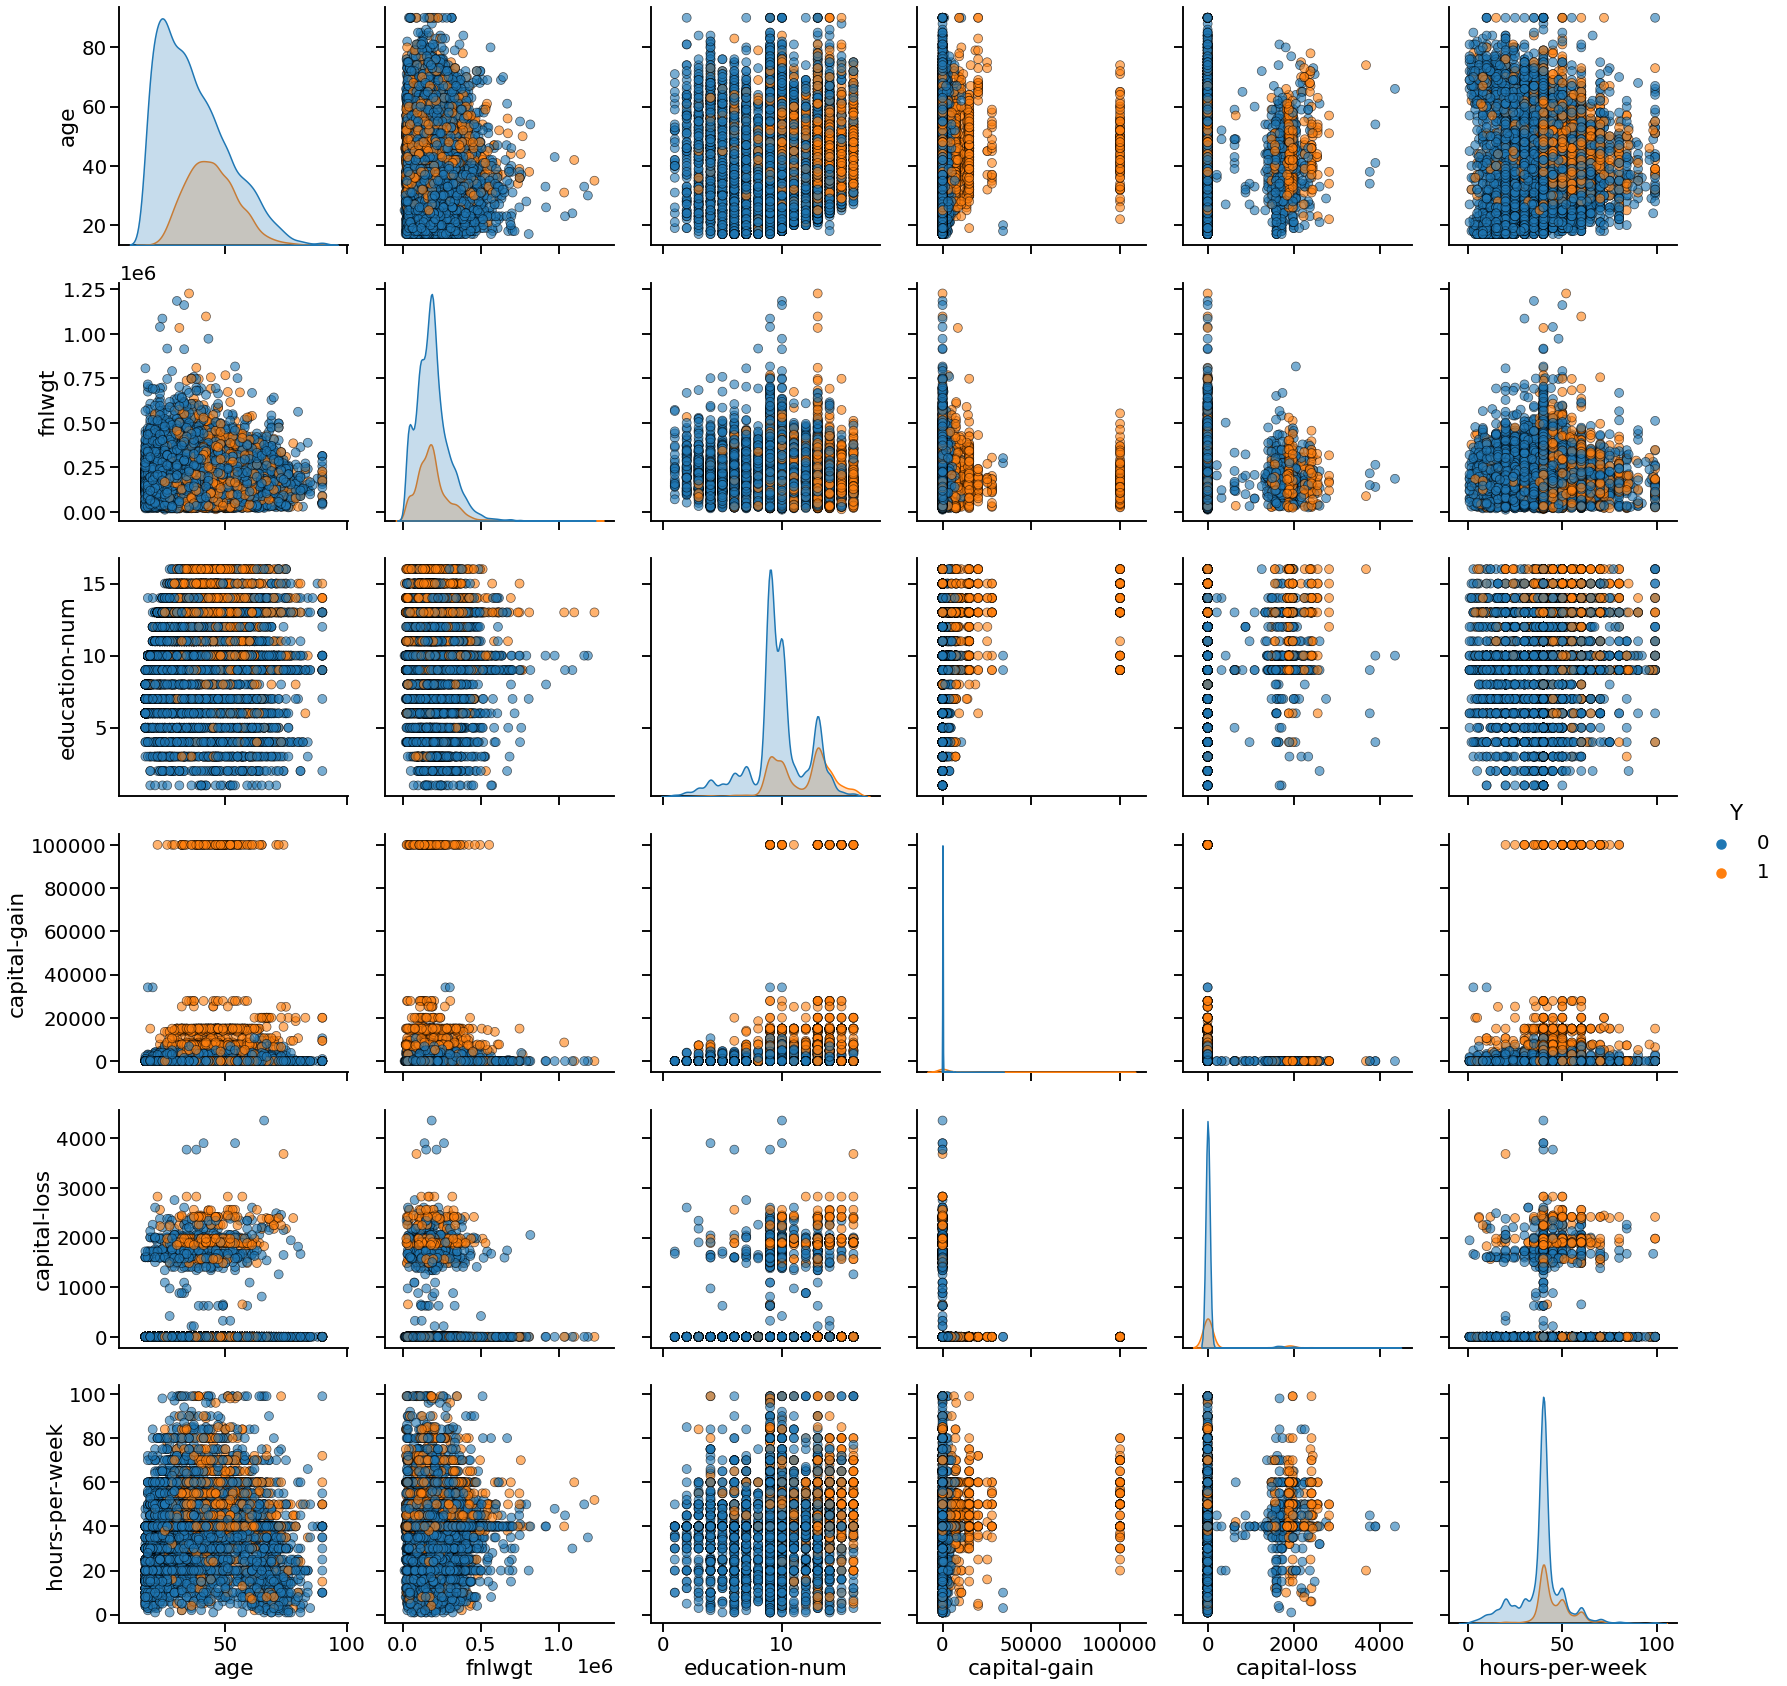

In [23]:
import matplotlib
matplotlib.rcParams['font.size'] = 5
sns.set_context('talk', font_scale=1.2);

sns.pairplot(df[col], hue = 'Y', diag_kind = 'kde',
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             height = 4);

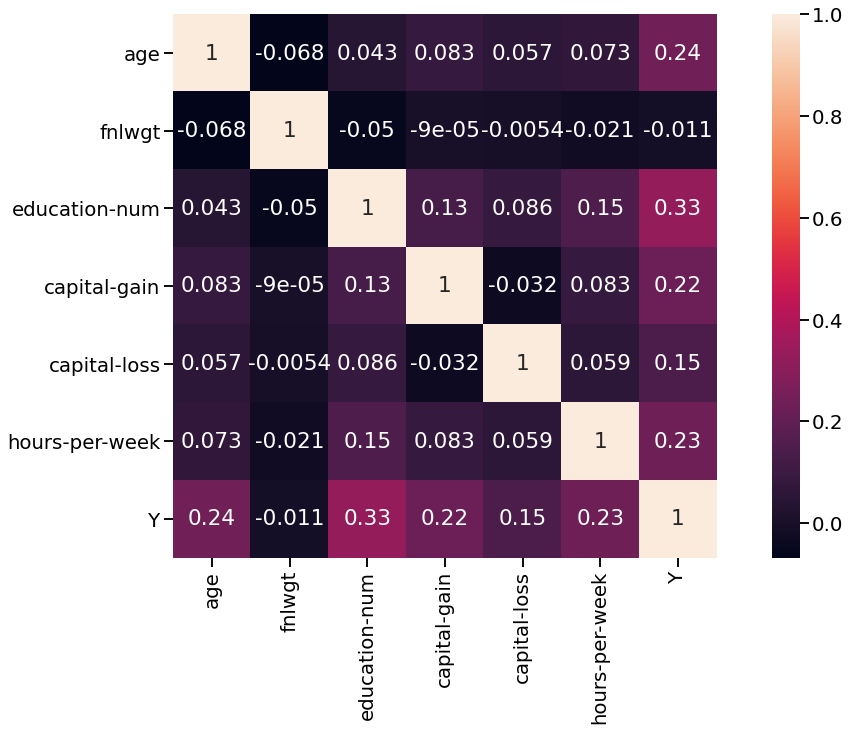

In [29]:
plt.figure(figsize=(20, 10))
cm = np.corrcoef(df[col].values.T)
hm = sns.heatmap(cm,cbar=True,annot=True,square=True,yticklabels=col,xticklabels=col)

## カテゴリデータのヒストグラム

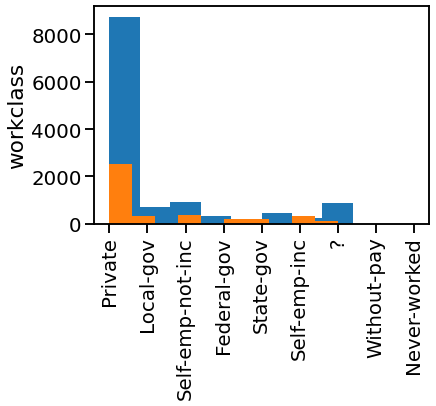

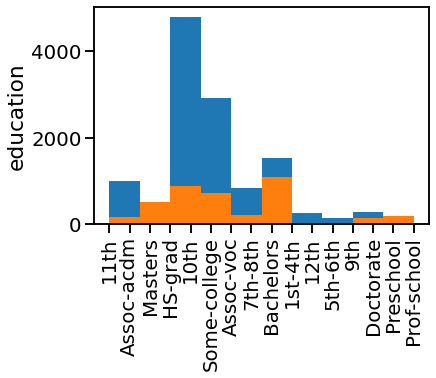

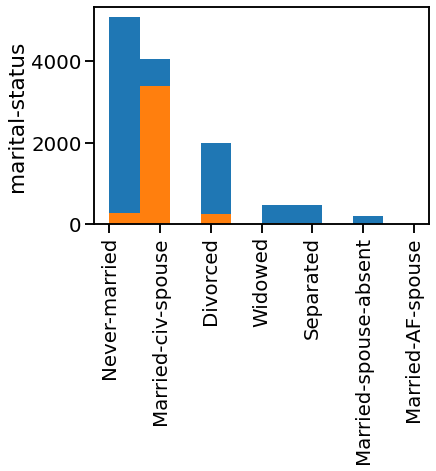

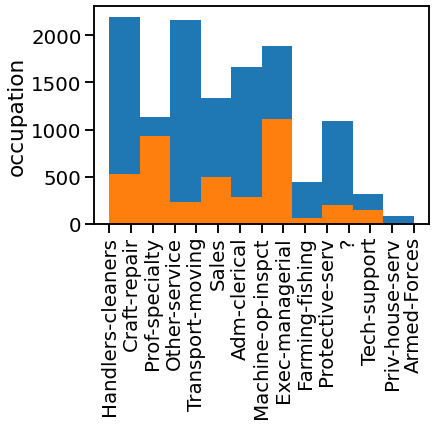

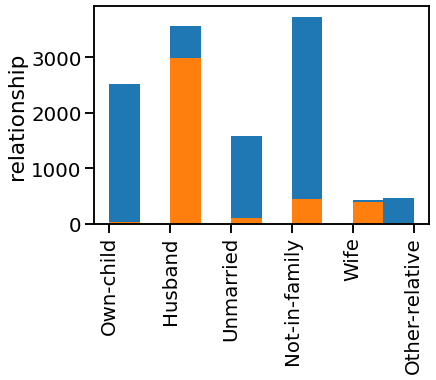

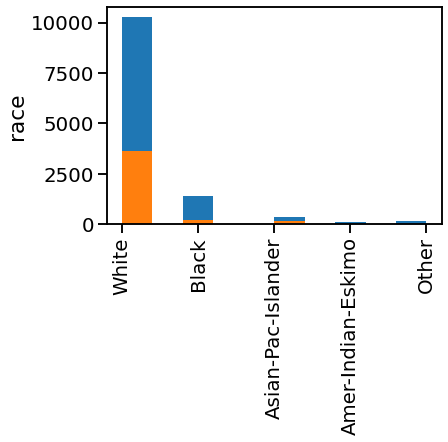

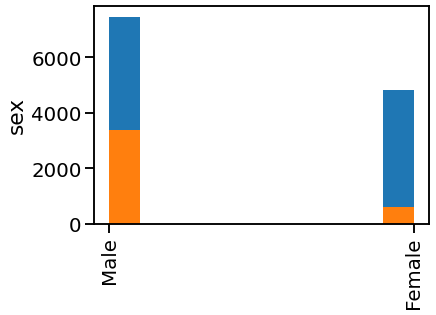

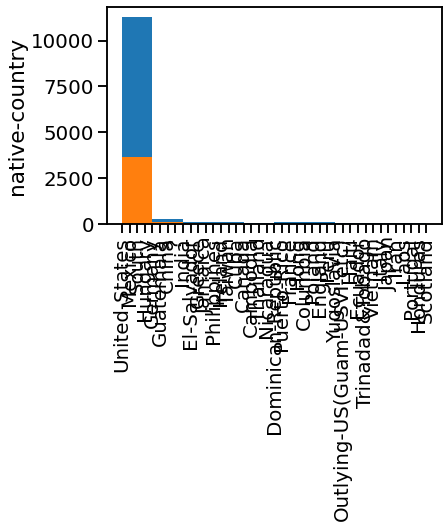

In [39]:
cat_list=['workclass','education','marital-status','occupation', 'relationship', 'race', 'sex', 'native-country']
df_0=df.query('Y==0')
df_1=df.query('Y==1')
for cat in cat_list:
    plt.hist(df_0[cat])
    plt.hist(df_1[cat])
    plt.xticks(rotation=90)
    plt.ylabel(cat)
    plt.show()